Import Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snr
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Load data and show first 10 rows of data

In [ ]:
Data = pd.read_csv(r'/content/gdrive/My Drive/IRIS.csv')
Data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


Calculates statistical values and rounds them to 3 decimal places

In [ ]:
Data.describe().round(3)

,sepal_length,sepal_width,petal_length,petal_width
count,150.000,150.000,150.000,150.000
mean,5.843,3.054,3.759,1.199
std,0.828,0.434,1.764,0.763
min,4.300,2.000,1.000,0.100
25%,5.100,2.800,1.600,0.300
50%,5.800,3.000,4.350,1.300
75%,6.400,3.300,5.100,1.800
max,7.900,4.400,6.900,2.500


Mark null values as True and returns sum of number of True values in each column

In [ ]:
Data.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


Extracting all information about data

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Shape of Data

In [ ]:
Data.shape

(150, 5)

Checking unique values of specific column

In [ ]:
Data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Change the catagorical data into numerical data by using OneHotEncoding

In [ ]:
Data['species']=Data['species'].apply({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}.get)
Data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Deviding the data into Dependent and Independent variables

In [ ]:
x=Data.drop(['species'],axis=1)
y=Data['species']
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y.head()

,species
0,0
1,0
2,0
3,0
4,0


Deviding the cleaned data into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

Creating first machine learning model 'Logistic Regression'

In [ ]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

Train the Data model

In [ ]:
log.fit(x_train,y_train)

LogisticRegression()

Make Predictions on model

In [ ]:
predictions=log.predict(x_test)
print(predictions)

[1 1 1 1 0 0 0 0 2 2 2 1 0 2 0 2 1 1 1 1 0 0 1 0 0 2 0 0 1 2]


Check confusion metrics and accuracy score

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,predictions)
ac=accuracy_score(y_test,predictions)

In [ ]:
print(cm)

[[12  0  0]
 [ 0 11  0]
 [ 0  0  7]]


In [ ]:
print(ac)

1.0


Creating second machine learning model 'Random Forest'

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier()

Train the model

In [ ]:
forest.fit(x_train,y_train)

RandomForestClassifier()

Make predictions on model

In [ ]:
predictions=forest.predict(x_test)
print(predictions)

[1 1 1 1 0 0 0 0 2 2 2 1 0 2 0 1 1 1 1 1 0 0 1 0 0 2 0 0 1 2]


Check cofusion metrics and accuracy score

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,predictions)
ac=accuracy_score(y_test,predictions)

In [ ]:
print(cm)

[[12  0  0]
 [ 0 11  0]
 [ 0  1  6]]


In [ ]:
print(ac)

0.9666666666666667


Creating third machine learning model

In [ ]:
from sklearn.svm import SVC
svm=SVC()

Train the model

In [ ]:
svm.fit(x_train,y_train)

SVC()

Make predictions on model

In [ ]:
predictions=svm.predict(x_test)
print(predictions)

[1 1 1 1 0 0 0 0 2 2 2 1 0 2 0 2 1 1 1 1 0 0 1 0 0 2 0 0 1 2]


Check confusion metrics ad accuracy score

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,predictions)
ac=accuracy_score(y_test,predictions)

In [ ]:
print(cm)

[[12  0  0]
 [ 0 11  0]
 [ 0  0  7]]


In [ ]:
print(ac)

1.0


In [ ]:
data = pd.DataFrame({
    'sno': range(1, 151),
    'sepal_length': [5.1, 4.9, 4.7, 4.6, 5.0] * 30,
    'species': ['Setosa'] * 50 + ['Versicolor'] * 50 + ['Virginica'] * 50
})

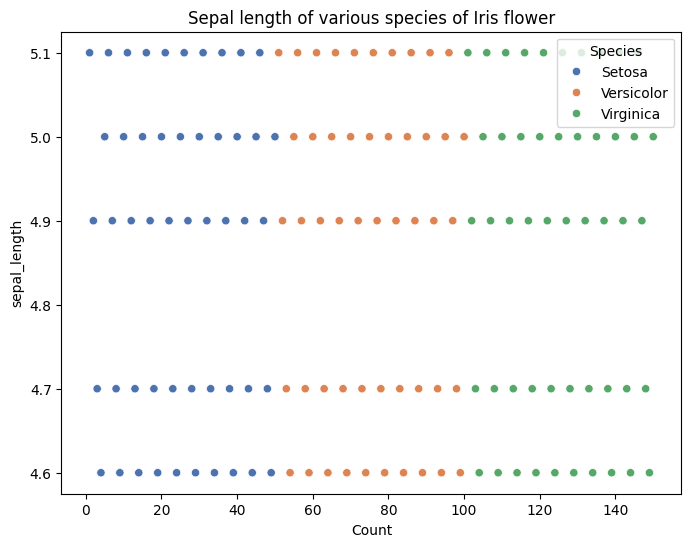

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example data for demonstration (replace with your actual dataset)
data = pd.DataFrame({
    'sno': range(1, 151),
    'sepal_length': [5.1, 4.9, 4.7, 4.6, 5.0] * 30,
    'species': ['Setosa'] * 50 + ['Versicolor'] * 50 + ['Virginica'] * 50
})

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sno', y='sepal_length', hue='species', palette='deep', data=data)
plt.xlabel('Count')
plt.title('Sepal length of various species of Iris flower')
plt.legend(title="Species")
plt.show()

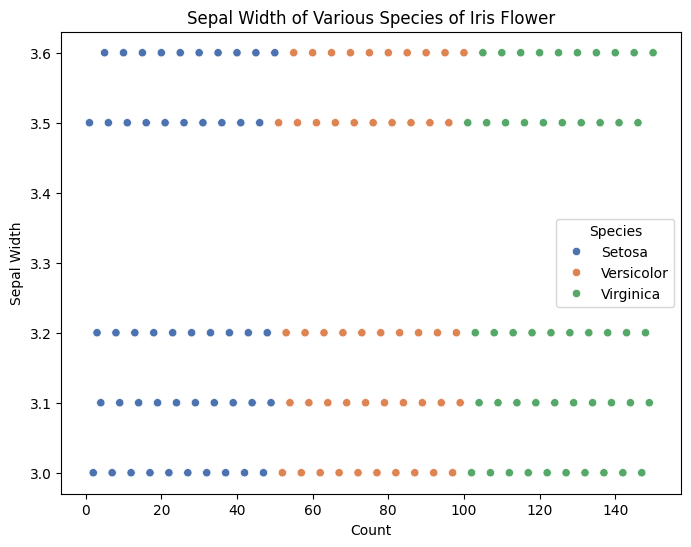

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example data (replace this with your actual dataset)
data = pd.DataFrame({
    'sno': range(1, 151),
    'sepal_width': [3.5, 3.0, 3.2, 3.1, 3.6] * 30,
    'species': ['Setosa'] * 50 + ['Versicolor'] * 50 + ['Virginica'] * 50
})

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sno', y='sepal_width', hue='species', palette='deep', data=data)
plt.xlabel('Count')
plt.ylabel('Sepal Width')
plt.title('Sepal Width of Various Species of Iris Flower')
plt.legend(title="Species")  # Automatic legend from Seaborn
plt.show()

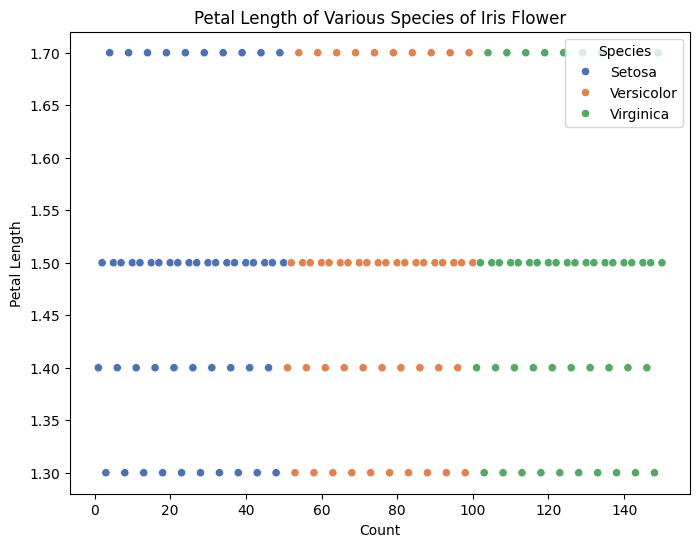

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example data (replace with your actual dataset)
data = pd.DataFrame({
    'sno': range(1, 151),
    'petal_length': [1.4, 1.5, 1.3, 1.7, 1.5] * 30,
    'species': ['Setosa'] * 50 + ['Versicolor'] * 50 + ['Virginica'] * 50
})

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sno', y='petal_length', hue='species', palette='deep', data=data)
plt.xlabel('Count')
plt.ylabel('Petal Length')
plt.title('Petal Length of Various Species of Iris Flower')
plt.legend(title="Species")  # Automatic legend from Seaborn
plt.show()

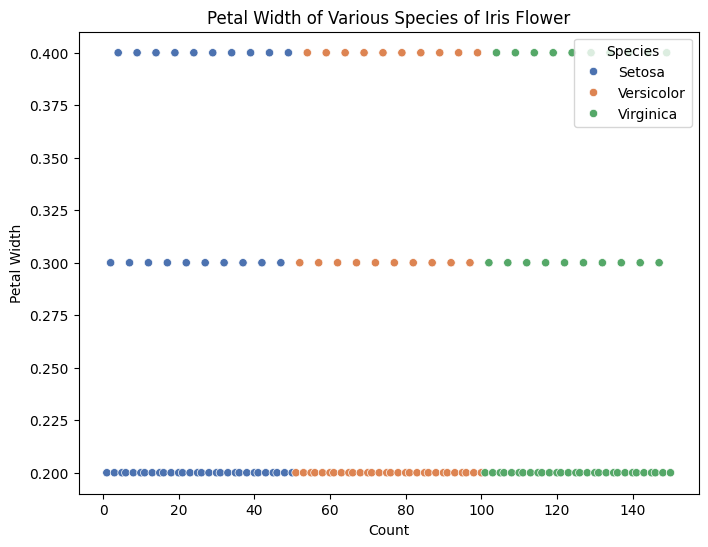

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example data (replace with your actual dataset)
data = pd.DataFrame({
    'sno': range(1, 151),
    'petal_width': [0.2, 0.3, 0.2, 0.4, 0.2] * 30,
    'species': ['Setosa'] * 50 + ['Versicolor'] * 50 + ['Virginica'] * 50
})

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sno', y='petal_width', hue='species', palette='deep', data=data)
plt.xlabel('Count')
plt.ylabel('Petal Width')
plt.title('Petal Width of Various Species of Iris Flower')
plt.legend(title="Species")  # Automatic legend from Seaborn
plt.show()